In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


In [2]:
data = pd.read_csv('traffic_weather.csv')   
data.head()

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,Full Date,date,tavg,tmin,tmax,prcp,snow,wspd,temperature
0,Azie MortonBarton Springs,7,9,2019,1,2,0,NB,28.0,9.0,2019-07-09 01:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,24.717245
1,Azie MortonBarton Springs,7,9,2019,1,2,0,SB,24.0,8.0,2019-07-09 01:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,24.717245
2,Azie MortonBarton Springs,7,9,2019,0,2,0,NB,28.0,25.0,2019-07-09 00:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,25.686649
3,Azie MortonBarton Springs,7,9,2019,0,2,0,SB,28.0,36.0,2019-07-09 00:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,25.686649
4,Azie MortonBarton Springs,7,8,2019,23,1,0,NB,27.0,26.0,2019-07-08 23:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,25.675000


In [3]:
# Ensure Full Date is a datetime object for proper sorting
data['Full Date'] = pd.to_datetime(data['Full Date'])

# Sort the data by Intersection Name, Direction, and Full Date
data = data.sort_values(by=['Intersection Name', 'Direction', 'Full Date'])

# Group by Intersection Name and Direction, then apply the lag
data['Lag_Traffic'] = data.groupby(['Intersection Name', 'Direction'])['Volume'].shift(8)

# Display the resulting data with the new column
data.head()


,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,Full Date,date,tavg,tmin,tmax,prcp,snow,wspd,temperature,Lag_Traffic
27876,Azie MortonBarton Springs,8,18,2017,12,5,0,NB,19.0,424.0,2017-08-18 12:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,36.440128,NaN
27874,Azie MortonBarton Springs,8,18,2017,13,5,0,NB,17.0,492.0,2017-08-18 13:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,37.449261,NaN
27872,Azie MortonBarton Springs,8,18,2017,14,5,0,NB,20.0,397.0,2017-08-18 14:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,38.083629,NaN
27870,Azie MortonBarton Springs,8,18,2017,15,5,0,NB,21.0,364.0,2017-08-18 15:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,38.300000,NaN
27868,Azie MortonBarton Springs,8,18,2017,16,5,0,NB,20.0,328.0,2017-08-18 16:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,38.083629,NaN


In [4]:
# count na values
data.isna().sum()

Intersection Name      0
Month                  0
Day                    0
Year                   0
Hour                   0
Day of Week            0
Holiday                0
Direction              0
Speed                  0
Volume                 0
Full Date              0
date                   0
tavg                   0
tmin                   0
tmax                   0
prcp                   0
snow                   0
wspd                   0
temperature            0
Lag_Traffic          224
dtype: int64

In [5]:
# drop na values
data = data.dropna()
data.isna().sum()

Intersection Name    0
Month                0
Day                  0
Year                 0
Hour                 0
Day of Week          0
Holiday              0
Direction            0
Speed                0
Volume               0
Full Date            0
date                 0
tavg                 0
tmin                 0
tmax                 0
prcp                 0
snow                 0
wspd                 0
temperature          0
Lag_Traffic          0
dtype: int64

In [6]:
# drop the Full Date, tavg, tmin, and tmax columns
data = data.drop(['Full Date', 'date', 'tavg', 'tmin', 'tmax'], axis=1)
data.head()

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,prcp,snow,wspd,temperature,Lag_Traffic
27860,Azie MortonBarton Springs,8,18,2017,20,5,0,NB,22.0,296.0,0.0,0,7.9,33.593501,424.0
27858,Azie MortonBarton Springs,8,18,2017,21,5,0,NB,24.0,200.0,0.0,0,7.9,31.950000,492.0
27856,Azie MortonBarton Springs,8,18,2017,22,5,0,NB,26.0,141.0,0.0,0,7.9,30.306499,397.0
27854,Azie MortonBarton Springs,8,18,2017,23,5,0,NB,27.0,94.0,0.0,0,7.9,28.775000,364.0
27852,Azie MortonBarton Springs,8,19,2017,0,6,0,NB,28.0,69.0,0.0,0,6.8,26.435608,328.0


In [7]:
label_encoder = LabelEncoder()
data_encoded = data
data_encoded['Intersection Name'] = label_encoder.fit_transform(data['Intersection Name'])
data_encoded['Direction'] = label_encoder.fit_transform(data['Direction'])

In [8]:
# Convert boolean values to integers (0/1)
#data_encoded = data_encoded.astype(int)

# Verify the encoded columns
data_encoded.head()


,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,prcp,snow,wspd,temperature,Lag_Traffic
27860,0,8,18,2017,20,5,0,0,22.0,296.0,0.0,0,7.9,33.593501,424.0
27858,0,8,18,2017,21,5,0,0,24.0,200.0,0.0,0,7.9,31.950000,492.0
27856,0,8,18,2017,22,5,0,0,26.0,141.0,0.0,0,7.9,30.306499,397.0
27854,0,8,18,2017,23,5,0,0,27.0,94.0,0.0,0,7.9,28.775000,364.0
27852,0,8,19,2017,0,6,0,0,28.0,69.0,0.0,0,6.8,26.435608,328.0


In [9]:
X = data_encoded.drop('Volume', axis=1)
y = data_encoded['Volume']

In [10]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Instantiate the model with more hyperparameters
rf_regressor = RandomForestRegressor(
    n_estimators=100,        # Number of trees in the forest
    bootstrap=True,          # Use bootstrapped samples for training
    random_state=42          # Random seed for reproducibility
)

In [13]:
# # Perform 5-fold cross-validation on the training data
# cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# # Convert negative MSE to RMSE
# cv_rmse = np.sqrt(-cv_scores)

# # Print the results
# print(f"Cross-Validation RMSE scores: {cv_rmse}")
# print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse)}")

In [14]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_pred = rf_regressor.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"RF Mean Squared Error: {mse}")
print(f"RF Root Mean Squared Error: {rmse}")
print(f"RF R-squared: {r2}")

RF Mean Squared Error: 9878.09718376784
RF Root Mean Squared Error: 99.38861697280952
RF R-squared: 0.9585344377284798


In [17]:
# Predict on the training set
y_train_pred = rf_regressor.predict(X_train)

# Calculate training metrics
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Training R^2: {train_r2}")

Training RMSE: 37.47617652919455
Training R^2: 0.9940647804782158


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


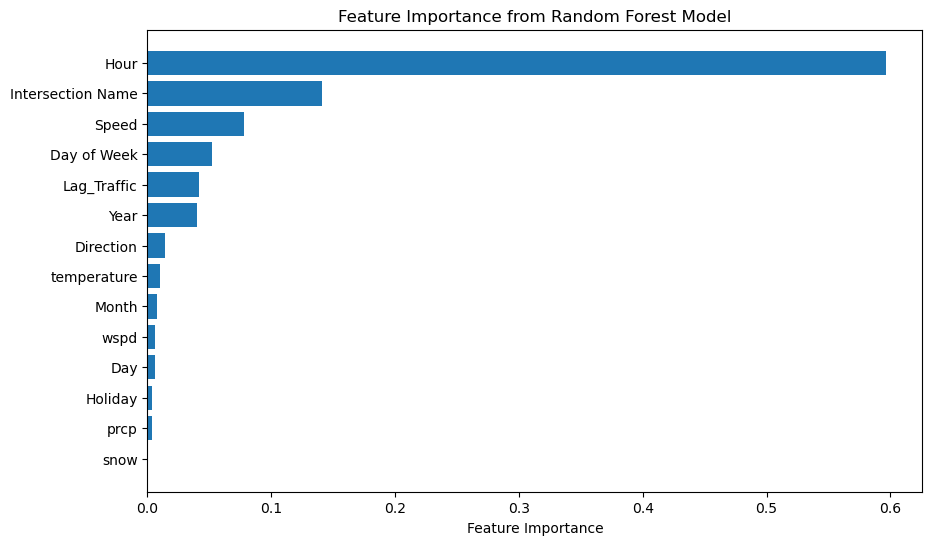

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance and feature names
feature_importance = rf_regressor.feature_importances_
feature_names = X.columns

# Sort feature importance values and corresponding feature names in descending order
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort indices in descending order
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot the sorted feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


In [19]:
data.dtypes


Intersection Name      int64
Month                  int64
Day                    int64
Year                   int64
Hour                   int64
Day of Week            int64
Holiday                int64
Direction              int64
Speed                float64
Volume               float64
prcp                 float64
snow                   int64
wspd                 float64
temperature          float64
Lag_Traffic          float64
dtype: object

## Linear Trees

In [20]:
from lineartree import LinearTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from lineartree import LinearForestRegressor


In [21]:
label_encoder = LabelEncoder()
data_encoded['Intersection Name'] = label_encoder.fit_transform(data['Intersection Name'])
data_encoded['Direction'] = label_encoder.fit_transform(data['Direction'])

In [22]:
data_encoded.head()

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,prcp,snow,wspd,temperature,Lag_Traffic
27860,0,8,18,2017,20,5,0,0,22.0,296.0,0.0,0,7.9,33.593501,424.0
27858,0,8,18,2017,21,5,0,0,24.0,200.0,0.0,0,7.9,31.950000,492.0
27856,0,8,18,2017,22,5,0,0,26.0,141.0,0.0,0,7.9,30.306499,397.0
27854,0,8,18,2017,23,5,0,0,27.0,94.0,0.0,0,7.9,28.775000,364.0
27852,0,8,19,2017,0,6,0,0,28.0,69.0,0.0,0,6.8,26.435608,328.0


In [23]:
# Step 1: Prepare the Data
# Assuming data_encoded is your DataFrame with all features
X = data_encoded.drop(columns=['Volume'])  # Features
y = data_encoded['Volume']  # Target variable


In [24]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:

# # Scale numeric features if necessary (e.g., for linear regression)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Scale target variable if necessary (e.g., for linear regression)
# scaler_y = MinMaxScaler()
# y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
# y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


In [26]:
data_encoded.head()

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,prcp,snow,wspd,temperature,Lag_Traffic
27860,0,8,18,2017,20,5,0,0,22.0,296.0,0.0,0,7.9,33.593501,424.0
27858,0,8,18,2017,21,5,0,0,24.0,200.0,0.0,0,7.9,31.950000,492.0
27856,0,8,18,2017,22,5,0,0,26.0,141.0,0.0,0,7.9,30.306499,397.0
27854,0,8,18,2017,23,5,0,0,27.0,94.0,0.0,0,7.9,28.775000,364.0
27852,0,8,19,2017,0,6,0,0,28.0,69.0,0.0,0,6.8,26.435608,328.0


In [27]:
# Split features: Categorical features for logical splitting
categorical_features = ['Holiday', 'Direction', 'Intersection Name']

split_features = ['Day of Week', 'Hour', 'temperature']

# Linear features: Continuous features for linear modeling
linear_features = ['Speed', 'prcp', 'snow', 'wspd', 'Hour', 'Day of Week', 'temperature', 'Lag_Traffic']



In [28]:
# Map feature names to indices for split_features and linear_features
categorical_features_indices = [X.columns.get_loc(feature) for feature in categorical_features]
split_feature_indices = [X.columns.get_loc(feature) for feature in split_features]
linear_feature_indices = [X.columns.get_loc(feature) for feature in linear_features]

In [29]:
# Step 3: Initialize and Train the LinearTreeRegressor
# Base estimator is LinearRegression
linear_tree = LinearTreeRegressor(
    base_estimator=LinearRegression(),
    criterion="rmse",              # Use RMSE for split quality
    max_depth=20,                   # Limit tree depth to prevent overfitting
    min_samples_split=700,          # Minimum samples to allow a split
    min_samples_leaf=100,            # Minimum samples in a leaf
    split_features=split_feature_indices,  # Features to use for splits
    linear_features=linear_feature_indices, # Features to use in the linear models
    categorical_features=categorical_features_indices
)

In [30]:
# Train the model
linear_tree.fit(X_train, y_train)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    categorical_features=[6, 7, 0], criterion='rmse',
                    linear_features=[8, 9, 10, 11, 4, 5, 12, 13], max_depth=20,
                    min_samples_leaf=100, min_samples_split=700,
                    split_features=[5, 4, 12])

In [31]:
# Step 4: Evaluate the Model
# Predict on the test set
y_pred = linear_tree.predict(X_test)
y_pred_linear_tree = linear_tree.predict(X_test)

In [32]:
# Calculate metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse}")
print(f"Test R^2: {r2}")

Test RMSE: 260.16979039277646
Test R^2: 0.7158628641857381


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


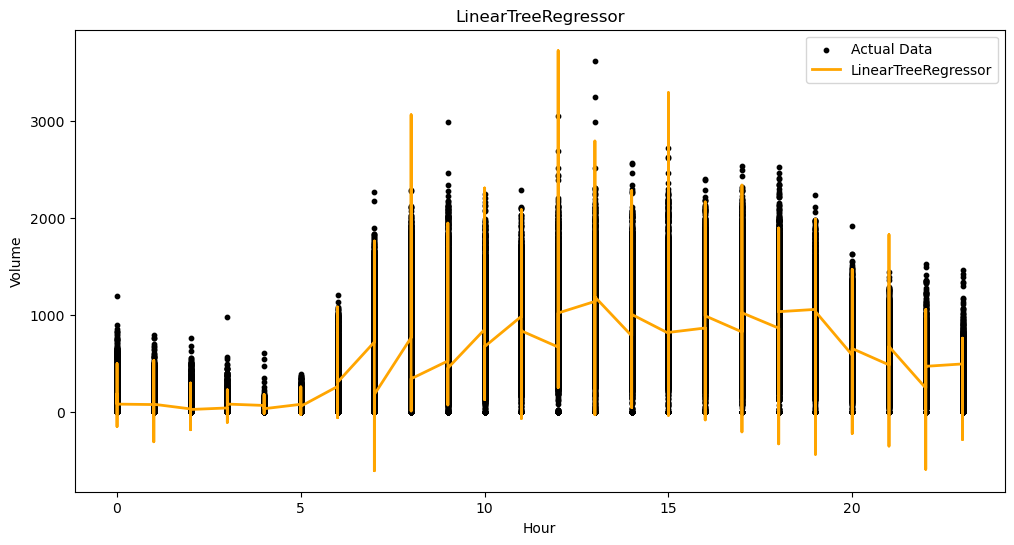

In [33]:
# Step 3: Prepare Data for Visualization
# Example: Use 'Hour' as the feature for plotting (adjust as needed)
plot_feature = X_test['Hour'].values  # Replace with the feature you want to plot
actual_values = y_test.values

# Sort values for better visualization
sorted_indices = np.argsort(plot_feature)
plot_feature_sorted = plot_feature[sorted_indices]
actual_values_sorted = actual_values[sorted_indices]
y_pred_linear_tree_sorted = y_pred_linear_tree[sorted_indices]

# Step 4: Create the Plot
plt.figure(figsize=(12, 6))

# Plot actual values
plt.scatter(plot_feature_sorted, actual_values_sorted, color='black', s=10, label='Actual Data')

# Plot LinearTreeRegressor predictions
plt.plot(plot_feature_sorted, y_pred_linear_tree_sorted, color='orange', linewidth=2, label='LinearTreeRegressor')

# Add labels, legend, and title
plt.xlabel("Hour")
plt.ylabel("Volume")
plt.title("LinearTreeRegressor")
plt.legend()
plt.show()

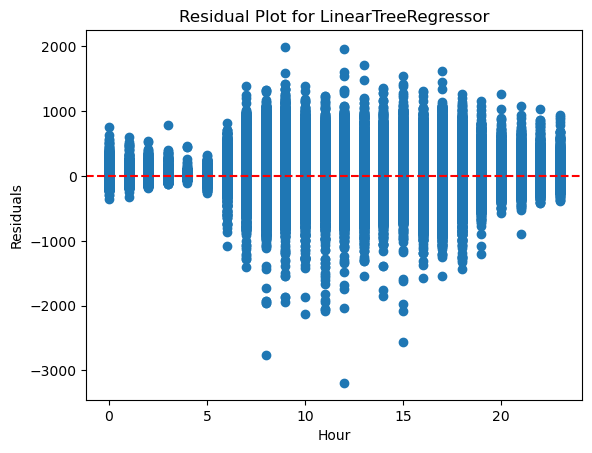

In [34]:
residuals = y_test - y_pred_linear_tree
plt.scatter(X_test['Hour'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Hour')
plt.ylabel('Residuals')
plt.title('Residual Plot for LinearTreeRegressor')
plt.show()
